In [1]:
import torch
from utils import device # detects whether you are using CPU or GPU
import matplotlib.pyplot as plt
from cust_plot import plot_rewards, plot_success, plot_mu, plot_sig
import numpy as np
import glob, os
import re

In [2]:
import pandas as pd

In [3]:
def process_brainexperiment(brain,exp, batch, n_av=1000):
    file = f"../SelectSetNotDoubleEpoch_sl_ns_{brain}_{batch}.pt"
    print(file)
    if os.path.isfile(file):
        tr_data = torch.load(file, map_location=device)
        reward_list = tr_data['rewards']
        success_list = tr_data['success']
        mu_list = tr_data['mu']
        mu_scale = abs(np.array(mu_list)).sum(axis=0)
        mu_list = mu_list / mu_scale
        sigma_list = tr_data['sig']
        sigma_list = sigma_list / mu_scale
        
        reward_mean = np.max(reward_list)#[-n_av:])
        success_mean = np.mean(success_list[-n_av:])
        mu_mean = np.mean(mu_list[:][-n_av:],axis=1)
        sigma_mean = np.mean(sigma_list[:][-n_av:],axis=1) 
        return [reward_mean,success_mean,mu_mean,sigma_mean]
    else:
        return [np.NaN,np.NaN,[],[]]

In [4]:
criteria = ['target_node','target_region','neighbour_just_visited_node','inter_regional_connections']
#criteria = ['all']

In [5]:
def process_brain(brain,batch,n_av = 1000):
    results = [process_brainexperiment(brain, exp, batch, n_av) for exp in range(1,2)]
    return results

In [6]:
def get_brain_efficiencies(brain, batch, n_av = 1000):
    results = process_brain(brain,batch, n_av)
    efficiencies = np.array([r[0] for r in results])
    return {criteria[i]: v  for (i,v) in enumerate(efficiencies[0:])}

In [7]:
def process_batch(batch):
    flist = glob.glob(f"../SelectSetNotDoubleEpoch_sl_ns_*_{batch}.pt")
    brainlist = np.unique(np.sort([int(re.findall(r'\d+',file)[0]) for file in flist]))
    efficiencies = {}
    for brain in brainlist:
        print(brain,batch)
        efficiencies[brain] = get_brain_efficiencies(brain,batch)
    return efficiencies

In [8]:
def compare_brain_by_batch(brain):
    flist = glob.glob(f"../SelectSetNotDoubleEpoch_sl_ns_{brain}_*.pt")
    batchlist = np.unique(np.sort([int(re.findall(r'\d+',file)[1]) for file in flist]))
    efficiencies = {}
    for batch in batchlist:
        efficiencies[batch] = get_brain_efficiencies(brain,batch)
    return efficiencies

In [9]:
def compare_everything():
    flist = glob.glob(f"../SelectSetNotDoubleEpoch_sl_ns_*_*.pt")
    batchlist = np.unique(np.sort([int(re.findall(r'\d+',file)[1]) for file in flist]))
    print(batchlist)
    efficiencies = {}
    for batch in batchlist:
        efficiencies[batch] = process_batch(batch)
    return efficiencies

In [10]:
results = compare_everything()

[98 99]
1 98
../SelectSetNotDoubleEpoch_sl_ns_1_98.pt
2 98
../SelectSetNotDoubleEpoch_sl_ns_2_98.pt
3 98
../SelectSetNotDoubleEpoch_sl_ns_3_98.pt
4 98
../SelectSetNotDoubleEpoch_sl_ns_4_98.pt
5 98
../SelectSetNotDoubleEpoch_sl_ns_5_98.pt
6 98
../SelectSetNotDoubleEpoch_sl_ns_6_98.pt
7 98
../SelectSetNotDoubleEpoch_sl_ns_7_98.pt
8 98
../SelectSetNotDoubleEpoch_sl_ns_8_98.pt
9 98
../SelectSetNotDoubleEpoch_sl_ns_9_98.pt
10 98
../SelectSetNotDoubleEpoch_sl_ns_10_98.pt
11 98
../SelectSetNotDoubleEpoch_sl_ns_11_98.pt
12 98
../SelectSetNotDoubleEpoch_sl_ns_12_98.pt
13 98
../SelectSetNotDoubleEpoch_sl_ns_13_98.pt
14 98
../SelectSetNotDoubleEpoch_sl_ns_14_98.pt
15 98
../SelectSetNotDoubleEpoch_sl_ns_15_98.pt
16 98
../SelectSetNotDoubleEpoch_sl_ns_16_98.pt
17 98
../SelectSetNotDoubleEpoch_sl_ns_17_98.pt
18 98
../SelectSetNotDoubleEpoch_sl_ns_18_98.pt
19 98
../SelectSetNotDoubleEpoch_sl_ns_19_98.pt
20 98
../SelectSetNotDoubleEpoch_sl_ns_20_98.pt
21 98
../SelectSetNotDoubleEpoch_sl_ns_21_98.pt
22

In [11]:
res = {k:pd.DataFrame(results[k]) for k in results}

In [12]:
df = pd.concat([res[k] for k in res],axis=1)

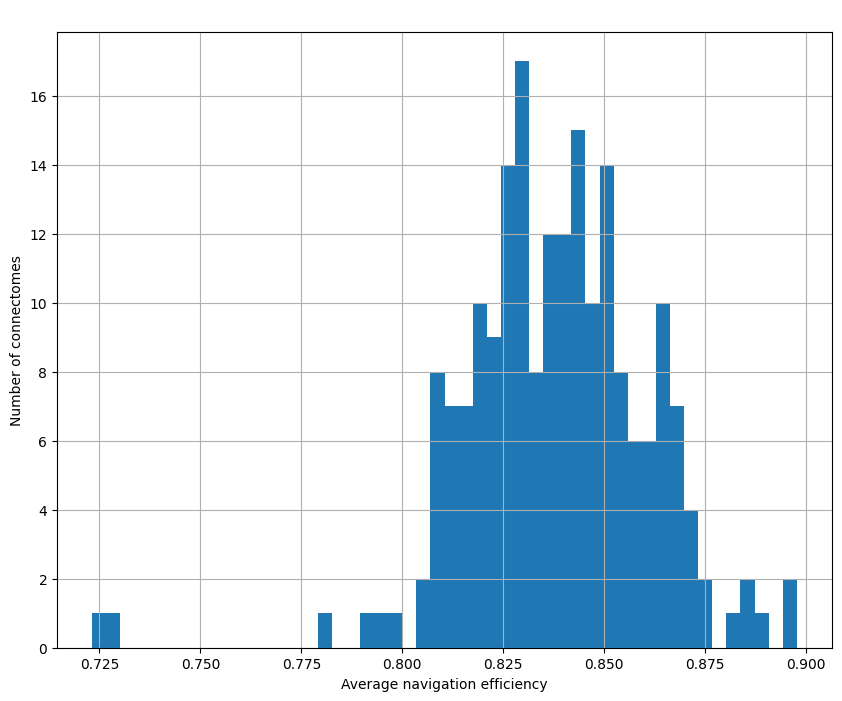

In [13]:
p1 = df.T.hist(bins=50,figsize=[10,8])
for p2 in p1:
    for p in p2:
        p.set_ylabel("Number of connectomes")
        p.set_xlabel("Average navigation efficiency")
        p.set_title(" ")
plt.savefig("histogram_4crit.pdf")

In [14]:
df.T.describe()

,target_node
count,200.000000
mean,0.838055
std,0.023211
min,0.723224
25%,0.824844
50%,0.838806
75%,0.851219
max,0.897667


In [18]:
results

{98: {1: {'target_node': 0.8538088202476501},
  2: {'target_node': 0.8197857737541199},
  3: {'target_node': 0.8470605611801147},
  4: {'target_node': 0.8499365448951721},
  5: {'target_node': 0.822568953037262},
  6: {'target_node': 0.826576828956604},
  7: {'target_node': 0.8431742191314697},
  8: {'target_node': 0.8183510303497314},
  9: {'target_node': 0.8313411474227905},
  10: {'target_node': 0.829301118850708},
  11: {'target_node': 0.8976666927337646},
  12: {'target_node': 0.848824679851532},
  13: {'target_node': 0.7293548583984375},
  14: {'target_node': 0.8421064019203186},
  15: {'target_node': 0.8619076013565063},
  16: {'target_node': 0.8490490913391113},
  17: {'target_node': 0.8295813202857971},
  18: {'target_node': 0.8295721411705017},
  19: {'target_node': 0.8470017910003662},
  20: {'target_node': 0.827012300491333},
  21: {'target_node': 0.8476130962371826},
  22: {'target_node': 0.8508777618408203},
  23: {'target_node': 0.8417816758155823},
  24: {'target_node':

In [15]:
# access Brain 3:
df.loc(axis=1)[:,3]

TypeError: unhashable type: 'slice'

In [ ]:
# Access Batch 95:
df.loc(axis=1)[99,:]

In [ ]:
p1 = df.T.hist(figsize=(20,20),bins=300);
for p2 in p1:
    for p in p2:
        p.set_xlim([-0.1,0.3])

In [ ]:
ps1 = df.T.plot.scatter(x='target_node',y='target_region')
ps1.set_xlim([-0.1,0.3])
ps1.set_ylim([-0.1,0.3])

In [ ]:
from pandas.plotting import scatter_matrix

fig = plt.figure(dpi=300, figsize=(20,20))
axarr = scatter_matrix(df.T, ax = plt.gca());
for i in range(12):
    for j in range(12):
        axarr[i,j].set_xlim(-0.1,0.3)
        axarr[i,j].set_ylim(-0.1,0.3)




In [ ]:
df_by_batch = df.stack(level=0)

In [ ]:
p1 = df_by_batch.T.hist(figsize=(20,20),bins=200);
for p2 in p1:
    for p in p2:
        p.set_xlim([-0.2,0.4])

In [ ]:
df_by_batch.T.describe().T

In [ ]:
results_brain = process_batch(99)

df = pd.DataFrame({key: {criteria[i-1] : results_brain[key][i] for i in range(1,13)} for key in results_brain})

df.T.hist()

In [ ]:
results_02 = compare_brain_by_batch(2)

df = pd.DataFrame({key: {criteria[i-1] : results_02[key][i] for i in range(1,13)} for key in results_02})

df.T.hist()

In [ ]:
df.T.hist(figsize=(20,15))

In [ ]:
os.path.isfile("blah")

In [ ]:
np.NaN

In [ ]:
results

In [20]:
qqq=torch.load("../SelectSetNotDoubleEpoch_sl_ns_92_99.pt")

In [31]:
np.shape(qqq['mu'])

(4, 30000)

In [49]:
[(qqq['mu'])[i][-1] for i in range(0,4)]

[2.989079713821411,
 3.4247384071350098,
 2.2738454341888428,
 -1.5461450815200806]

In [53]:
qqq['fns']

['target_node',
 'target_region',
 'inter_regional_connections',
 'neighbour_just_visited_node']